In [3]:
import math
import rasterio
from rasterio import warp
from rasterio.windows import Window
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fname = "/Users/jasonkao/Desktop/NLCD_2016_Impervious_descriptor_L48_20190405/NLCD_2016_Impervious_descriptor_L48_20190405.img"

In [5]:
img = rasterio.open(fname)

In [9]:
%%time
band = img.read(1)

CPU times: user 7.51 s, sys: 18.1 s, total: 25.6 s
Wall time: 46.1 s


In [ ]:
band_ma = np.ma.masked_where(band == 127, band)

## Generate thumbnail for preview

CPU times: user 1min 3s, sys: 11.2 s, total: 1min 14s
Wall time: 1min 44s


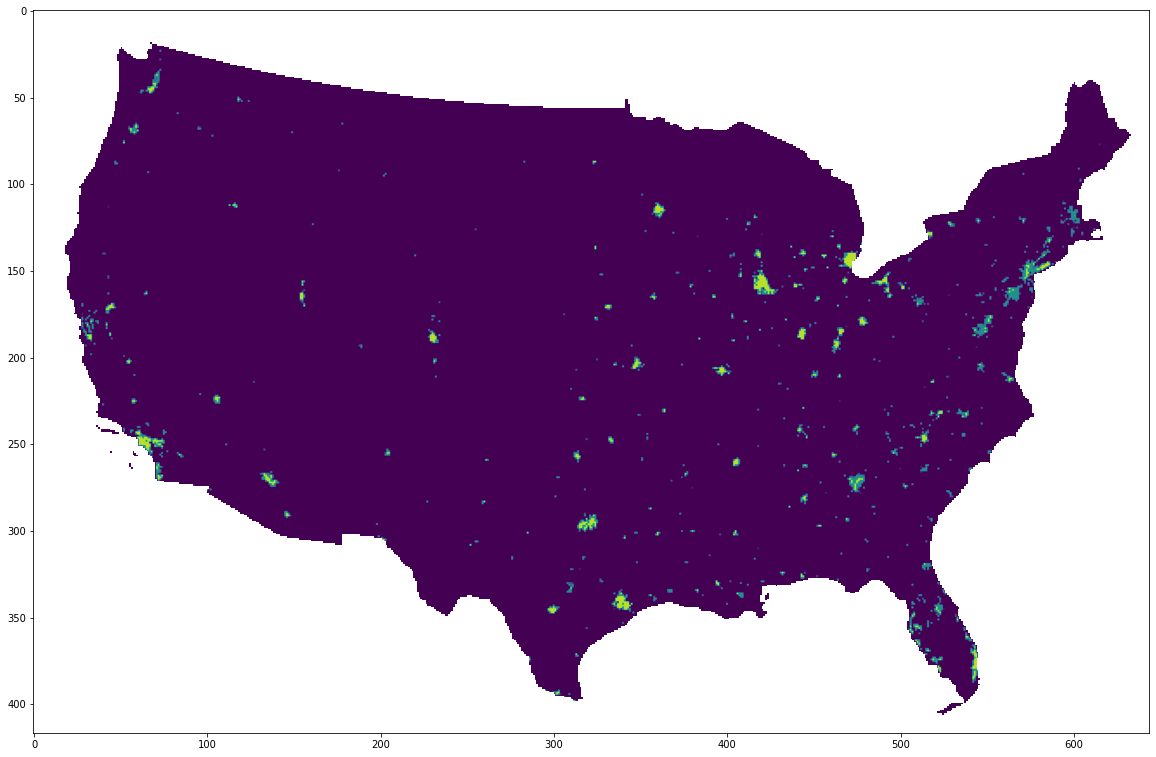

In [8]:
%%time
chunk_size = 250
nrows = math.floor(img.shape[0] / chunk_size)
ncols = math.floor(img.shape[1] / chunk_size)

result = np.zeros((nrows, ncols))
for r in range(nrows):
    for c in range(ncols):
        w = Window(c * chunk_size, r * chunk_size, chunk_size, chunk_size)
        b = img.read(1, window=w)
        result[r, c] = np.median(b)
result_ma = np.ma.masked_where(result == 127, result)
plt.figure(figsize = (20,30))
plt.imshow(result_ma)